<a href="https://colab.research.google.com/github/erika0915/fake-news-detection/blob/main/naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 수정된 경로
common_path = "/content/drive/MyDrive/기학/최수희/embedding완료/"
train_path = common_path + "embedded_0.5_newsdata_train.csv"
test_path = common_path + "embedded_0.5_newsdata_test.csv"

# 데이터 로드
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Train Dataset Class Distribution:
useType
0    61939
1    58203
Name: count, dtype: int64

Test Dataset Class Distribution:
useType
0    15566
1    14470
Name: count, dtype: int64


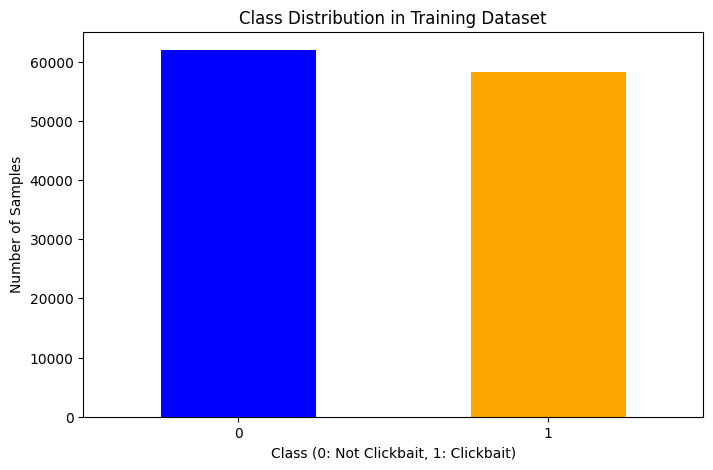

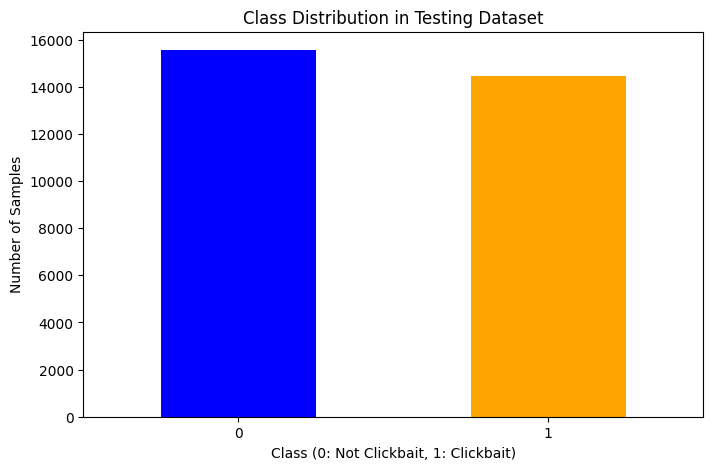

In [ ]:
# 클래스 분포 확인
print("Train Dataset Class Distribution:")
print(train_data['useType'].value_counts())

print("\nTest Dataset Class Distribution:")
print(test_data['useType'].value_counts())

# 시각화 (막대 그래프)
train_class_counts = train_data['useType'].value_counts()
test_class_counts = test_data['useType'].value_counts()

plt.figure(figsize=(8, 5))
train_class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution in Training Dataset")
plt.xlabel("Class (0: Not Clickbait, 1: Clickbait)")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(8, 5))
test_class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title("Class Distribution in Testing Dataset")
plt.xlabel("Class (0: Not Clickbait, 1: Clickbait)")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.show()


In [ ]:
print("Train Dataset Class Distribution:")
print(train_data['useType'].value_counts())

Train Dataset Class Distribution:
useType
0    61939
1    58203
Name: count, dtype: int64


In [ ]:
# 문자열을 numpy 배열로 변환하는 함수
def parse_vectors(vector_string):
    if isinstance(vector_string, str):
        return np.array([float(x) for x in vector_string.strip("[]").split(",")])
    return np.zeros(150)  # 결측값 또는 잘못된 값은 0으로 채워진 고정 크기 벡터로 처리

# 벡터 변환
train_data['newsContent'] = train_data['newsContent'].apply(parse_vectors)
test_data['newsContent'] = test_data['newsContent'].apply(parse_vectors)
train_data['newsTitle'] = train_data['newsTitle'].apply(parse_vectors)
test_data['newsTitle'] = test_data['newsTitle'].apply(parse_vectors)

# 뉴스 제목과 본문 벡터를 합치기
train_data['total'] = train_data['newsContent'] + train_data['newsTitle']
test_data['total'] = test_data['newsContent'] + test_data['newsTitle']

# X, y 데이터 준비
X_train = np.array(train_data['total'].tolist())
y_train = train_data['useType']
X_test = np.array(test_data['total'].tolist())
y_test = test_data['useType']

# 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy Score :  0.6321081369023838
Classification Report :
               precision    recall  f1-score   support

           0       0.62      0.77      0.68     15566
           1       0.66      0.49      0.56     14470

    accuracy                           0.63     30036
   macro avg       0.64      0.63      0.62     30036
weighted avg       0.64      0.63      0.62     30036



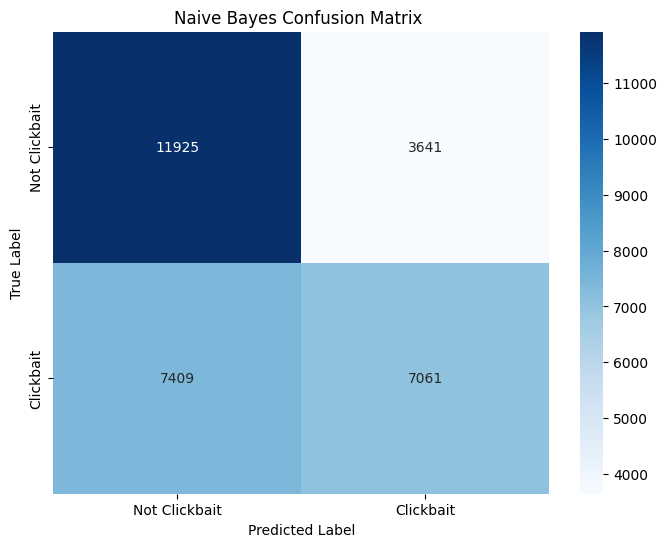

In [ ]:
# PCA를 통한 차원 축소
pca = PCA(n_components=50)  # 차원을 50으로 축소
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Naive Bayes 모델 학습
nb_model = GaussianNB()
nb_model.fit(X_train_pca, y_train)

# 예측 및 평가
y_pred_pca = nb_model.predict(X_test_pca)

print("Accuracy Score : ", accuracy_score(y_test, y_pred_pca))
print("Classification Report :\n", classification_report(y_test, y_pred_pca))

# 혼동 행렬 시각화
cm_pca = confusion_matrix(y_test, y_pred_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues', xticklabels=["Not Clickbait", "Clickbait"], yticklabels=["Not Clickbait", "Clickbait"])
plt.title("Naive Bayes Confusion Matrix ")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
